In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# importing the data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import io

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/BCG_Virtual_experience/comb_data.csv')

In [4]:
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  forecast_cons_12m  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23               0.00   
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31             189.95   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17              47.96   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31             240.04   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450      

In [5]:
df['date_activ'].dtypes

dtype('O')

In [6]:
df["date_activ"] = pd.to_datetime(df["date_activ"])
df["date_end"] = pd.to_datetime(df["date_end"])
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"])
df["date_renewal"] = pd.to_datetime(df["date_renewal"])

In [7]:
df=df.drop(columns='Unnamed: 0')

In [8]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.6881

In [9]:
price_df = pd.read_csv('/content/gdrive/MyDrive/BCG_Virtual_experience/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

**Below is the code that my colleague created, I am going to build upon that.**

In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [11]:
df = pd.merge(df, diff, on='id')
print(df.shape)
df.head()

(14605, 64)


id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.6881

In the case of off-peak prices, the distribution is likely to be skewed, as there are likely to be a few high-priced days that pull the mean up. In this case, the median would be a better measure of central tendency than the mean.

If you have a distribution of off-peak prices with a few very high-priced days, the mean price will be higher than the median price. This is because the mean is influenced by all the values in the distribution, including the outliers. The median, on the other hand, is not influenced by outliers, so it is a more accurate representation of the typical off-peak price.

In general, the mean is a good measure of central tendency when the distribution is symmetrical. However, when the distribution is skewed, the median is often a better choice.

Next we find the maximum of the medians.

In [12]:
median_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'median',
    'price_peak_var': 'median',
    'price_mid_peak_var': 'median',
    'price_off_peak_fix': 'median',
    'price_peak_fix': 'median',
    'price_mid_peak_fix': 'median'
}).reset_index()

In [13]:
median_prices_by_month['off_peak_peak_var_median_diff'] = median_prices_by_month['price_off_peak_var'] - median_prices_by_month['price_peak_var']
median_prices_by_month['peak_mid_peak_var_median_diff'] = median_prices_by_month['price_peak_var'] - median_prices_by_month['price_mid_peak_var']
median_prices_by_month['off_peak_mid_peak_var_median_diff'] = median_prices_by_month['price_off_peak_var'] - median_prices_by_month['price_mid_peak_var']
median_prices_by_month['off_peak_peak_fix_median_diff'] = median_prices_by_month['price_off_peak_fix'] - median_prices_by_month['price_peak_fix']
median_prices_by_month['peak_mid_peak_fix_median_diff'] = median_prices_by_month['price_peak_fix'] - median_prices_by_month['price_mid_peak_fix']
median_prices_by_month['off_peak_mid_peak_fix_median_diff'] = median_prices_by_month['price_off_peak_fix'] - median_prices_by_month['price_mid_peak_fix']

In [14]:
max_diff_across_periods_months = median_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_median_diff': 'max',
    'peak_mid_peak_var_median_diff': 'max',
    'off_peak_mid_peak_var_median_diff': 'max',
    'off_peak_peak_fix_median_diff': 'max',
    'peak_mid_peak_fix_median_diff': 'max',
    'off_peak_mid_peak_fix_median_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_median_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_median_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_median_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_median_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_median_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_median_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [15]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
print(df.shape)
df.head()

(14605, 70)


id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.6881

Date doesnt have importance in prediction of churn rate , but we can modify it to duration which is impactful.

This is because the longer a customer has been subscribed, the more likely they will be satisfied with the product and continue subscribing. In addition, the longer a customer has been subscribed, the more likely they are to have invested in the product, which makes them less likely to churn.

In [16]:
date=pd.datetime(2016, 1, 1)
def convert_months(df, column):
    time_delta = date - df[column]
    duration = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return duration

<ipython-input-16-d00b4c67de3c>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date=pd.datetime(2016, 1, 1)


In [17]:
df['months_activ'] = convert_months( df, 'date_activ')
df['months_to_end'] = -convert_months( df, 'date_end')
df['months_modif_prod'] = convert_months( df, 'date_modif_prod')
df['months_renewal'] = convert_months( df, 'date_renewal')

In [18]:
df = df.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.688156                 24.412893   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     14.901340                 41.067053   
1                      0.000000                 44.460984   
2                      0.000000                 44.555962   
3                      0.000000                 44.551475   

###**Now coverting all the categorical datas into dummy nummeric data.**

In [19]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')

In [20]:
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

In [21]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_med_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3     

In [22]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

Now since the data are not scaled properly, converting them to logarithmic range.

In [23]:
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [24]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak       has_gas      imp_cons  \
count                 14605.000000  14605.000000  14605.000000   
mean                     43.130085      0.181445      1.240835   
std                       4.486140      0.385399      1.138314   
min                       0.000000      0.000000      0.000000   
25%                      40.606701      0.000000      0.000000   
50%                      44.311378      0.000000      1.584331   
75%                      44.311378      0.000000      2.290012   
max                      59.266378      1.000000      4.177357   

       margin_gross_pow_ele  margin_net_pow_ele   nb_prod_act    net_margin  \
count          14605.000000        14605.000000  14605.000000  14605.000000   
mean              24.564667           24.562063      1.292297    189.263798   
std               20.231790           20.230898      0.709774    311.808793   
min                0.000000            0.000000      1.000000      0.000000   
25%               14.280000           14.280000      1.000000     50.710000   
50%               21.640000           21.640000      1.000000    112.500000   
75%               29.880000           29.880000      1.000000    243.130000   
max              374.640000          374.640000     32.000000  24570.650000   

       num_years_antig       pow_max  mean_year_price_off_peak_var  \
count     14605.000000  14605.000000                  14605.000000   
mean          4.997946     18.135429                      0.142326   
std           1.611720     13.535160                      0.022512   
min           1.000000      3.300000                      0.000000   
25%           4.000000     12.500000                      0.124430   
50%           5.000000     13.856000                      0.147630   
75%           6.000000     19.180000                      0.150415   
max          13.000000    320.000000                      0.278098   

       mean_year_price_peak_var  mean_year_price_mid_peak_var  \
count  

<ipython-input-25-9e27b464baa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


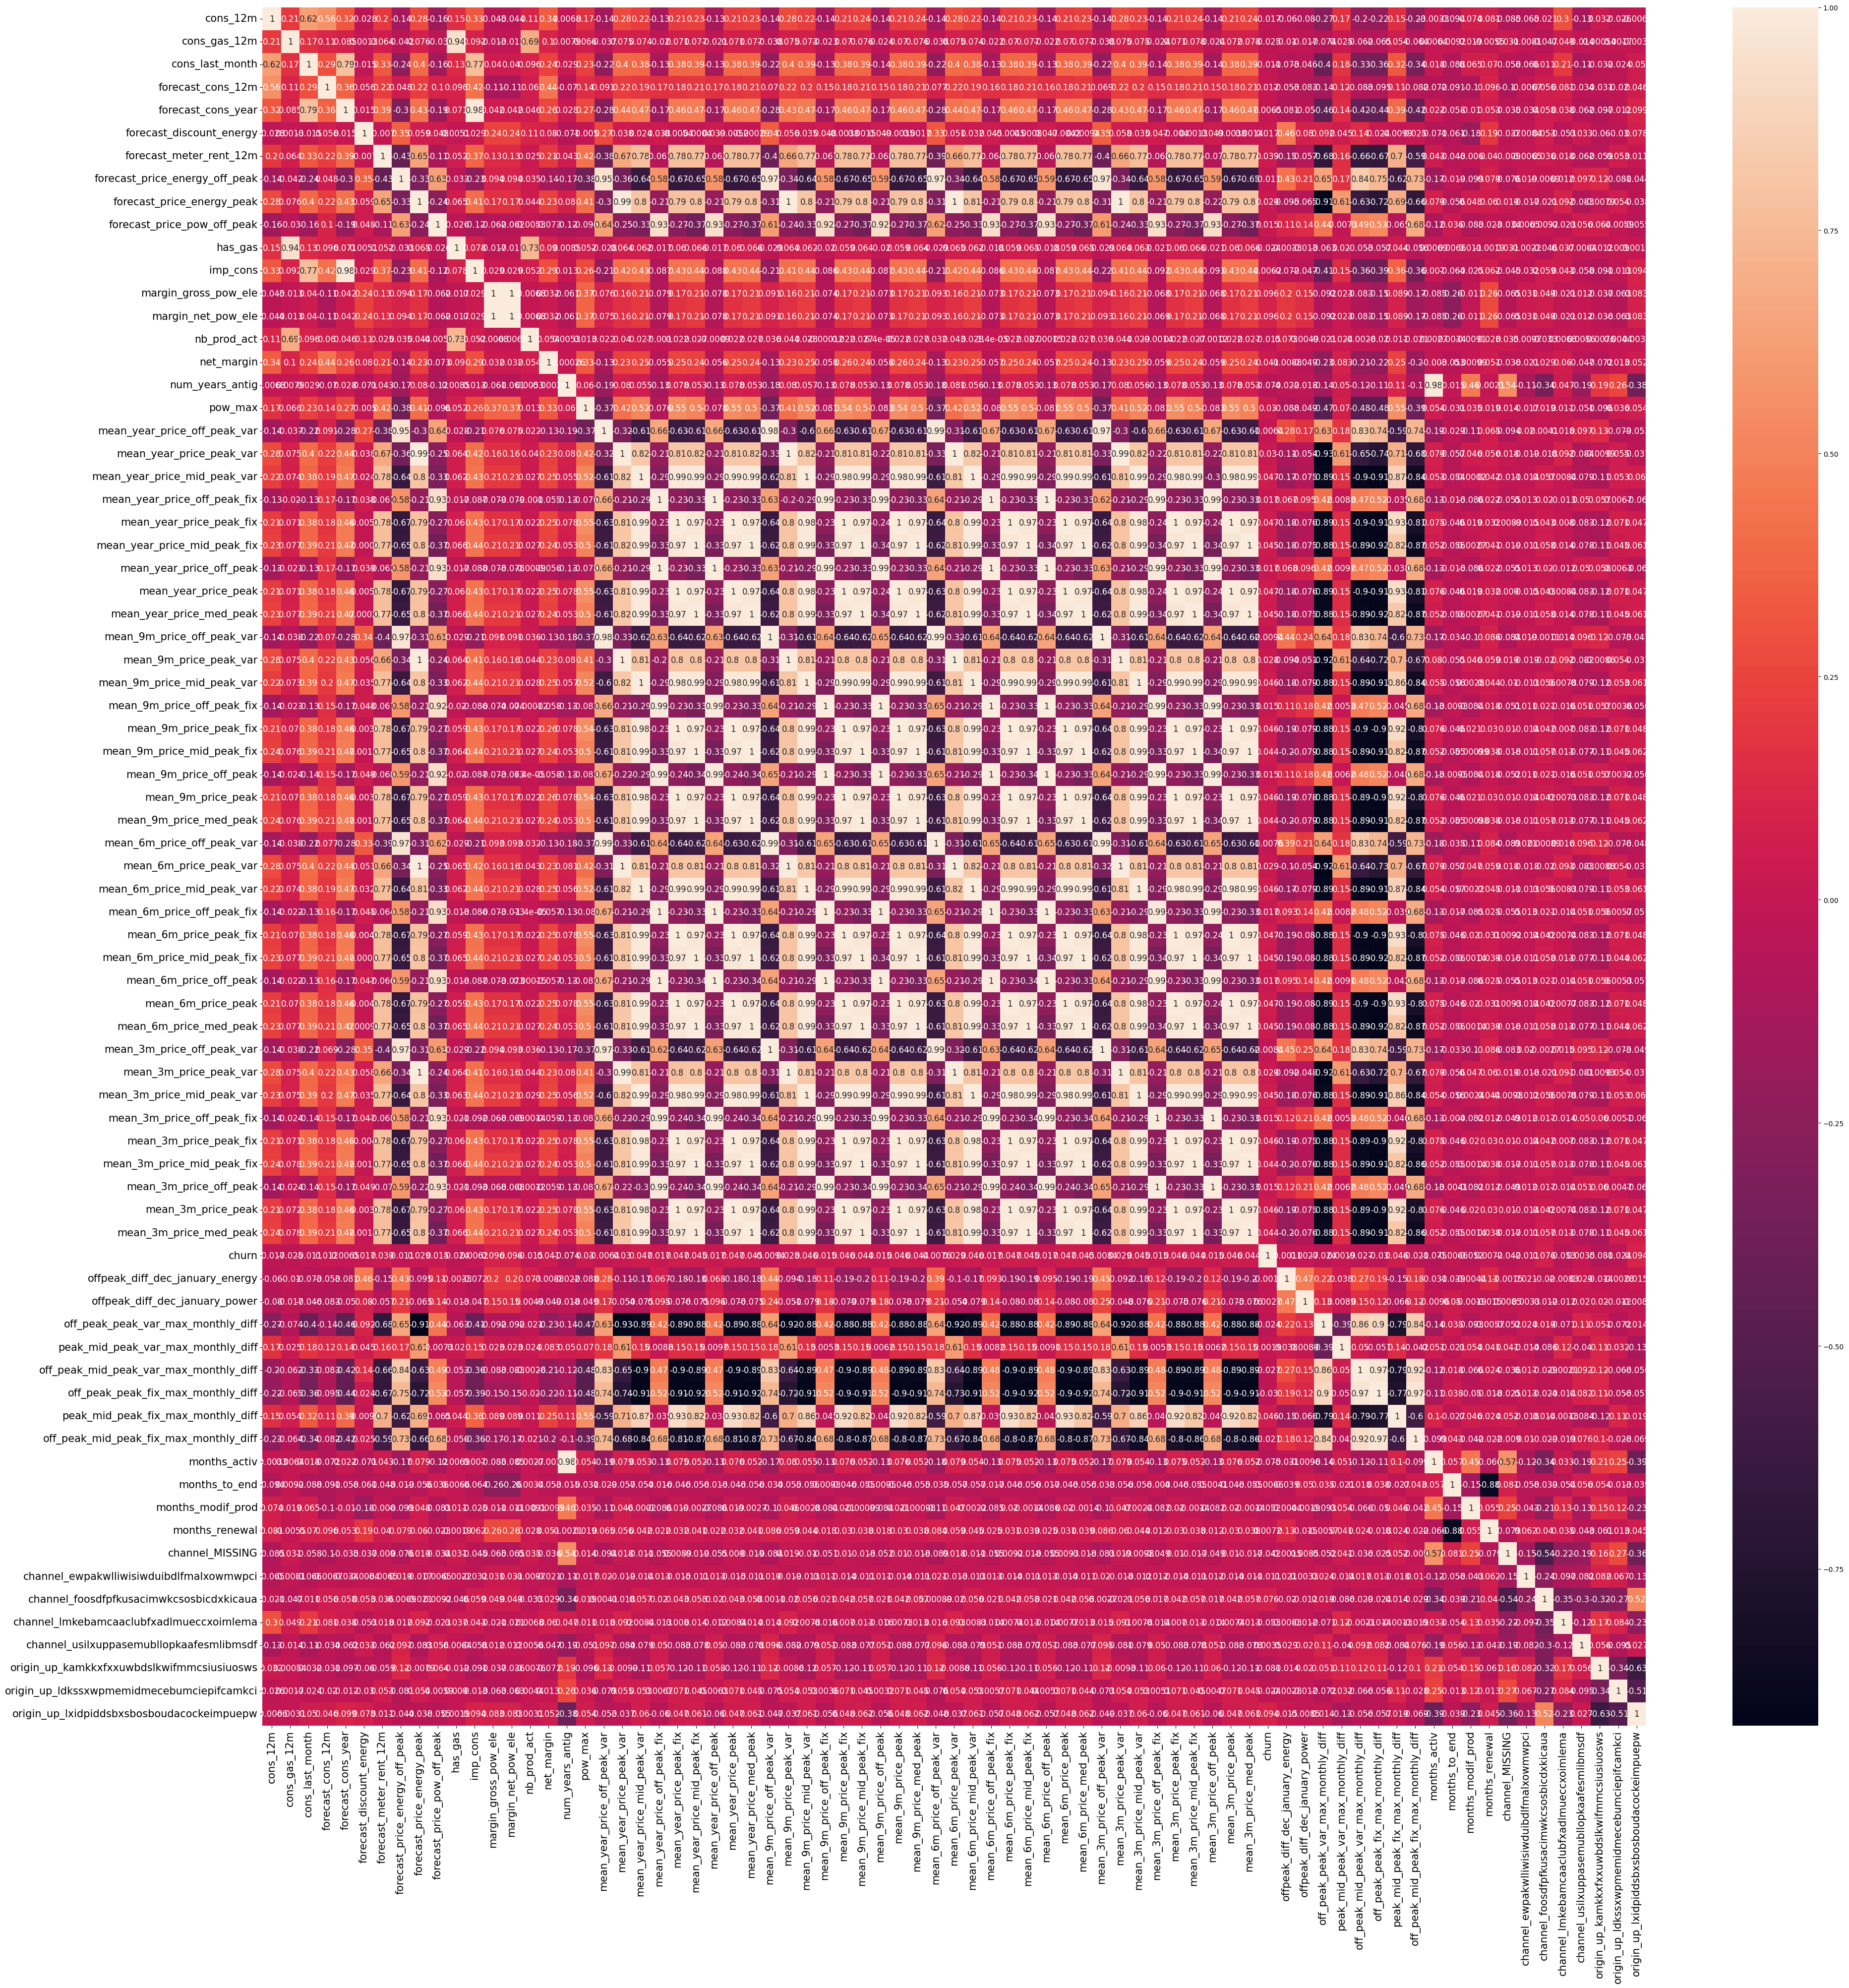

In [25]:
correlation = df.corr()

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Dropping the columns which have multicollinearity.**

In [26]:
df = df.drop(columns=['forecast_cons_year','peak_mid_peak_fix_max_monthly_diff'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               25.44            2      678.99                3   43.648   
1               16.38            1       18.89                6   13.800   
2               28.60            1        6.60                6   13.856   
3               30.22            1       25.46                6   13.200   
4               44.91            1       47.98                6   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_med_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3                 44.551475              0.000000                  0.000000   
4                 40.812330             24.516531                 16.348129   

   mean_9m_price_off_peak_var  mean_9m_price_peak_var  \
0                    0.126997                0.095024   
1                    0.147600                0.000000   
2                    0.167798  

##**Modelling**

**Using Random Forest for predicting this categorical data.**

In [27]:
Y = df['churn']
X = df.drop(columns=['id', 'churn'])

**Splitting the dataset into training, validating, and testing data.**

In [28]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

X_tr, X_val, y_tr, y_val = train_test_split(X_train1, Y_train1, test_size=0.25, stratify=Y_train1, random_state=0)

In [77]:
rf2=RandomForestClassifier(
    n_estimators=1000,
)

In [33]:
# %%time

# rf1.fit(X_tr, y_tr)

CPU times: user 1h 28min 1s, sys: 6.39 s, total: 1h 28min 7s
Wall time: 1h 28min 23s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 6], 'max_features': [1.0],
                         'max_samples': [0.7, 0.9], 'min_samples_leaf': [5, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [1000, 500]},
             refit='roc_auc', scoring={'recall', 'accuracy', 'roc_auc', 'f1'})

In [78]:
%%time
rf2.fit(X_tr,y_tr)

CPU times: user 33.5 s, sys: 146 ms, total: 33.6 s
Wall time: 33.7 s


RandomForestClassifier(n_estimators=1000)

In [69]:
from sklearn import metrics

In [79]:
predictions = rf2.predict(X_test1)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test1, predictions).ravel()

In [80]:
print(f"Accuracy: {metrics.accuracy_score(Y_test1, predictions)}")
print(f"Precision: {metrics.precision_score(Y_test1, predictions)}")
print(f"Recall: {metrics.recall_score(Y_test1, predictions)}")

Accuracy: 0.9079082505991098
Precision: 0.8571428571428571
Recall: 0.06338028169014084


In [82]:
predictions2 = rf2.predict(X_val)
tn, fp, fn, tp = metrics.confusion_matrix(y_val, predictions2).ravel()

In [83]:
print(f"Accuracy: {metrics.accuracy_score(y_val, predictions2)}")
print(f"Precision: {metrics.precision_score(y_val, predictions2)}")
print(f"Recall: {metrics.recall_score(y_val, predictions2)}")

Accuracy: 0.9082505991098939
Precision: 0.8333333333333334
Recall: 0.07042253521126761


We notice that for both validation and testing data:
Accuracy is high i.e 90%
Precision is 85-83%
Recall is low - 0.6-0.7%

A high accuracy of 90% means that the model is correctly predicting the majority of the cases. However, a low recall of 0.6-0.7% means that the model is missing a lot of the cases that it should be predicting. This is a problem because it means that the model is not identifying all of the customers who are at risk of churning.

The high precision of 85-83% means that when the model does predict that a customer is at risk of churning, it is usually correct. However, the low recall means that the model is not predicting enough of the customers who are actually at risk.

There are a few possible explanations for why the recall is so low. One possibility is that the dataset is imbalanced, meaning that there are many more customers who are not at risk of churning than there are customers who are at risk. In this case, the model may be biased towards predicting that customers are not at risk, even if they actually are.

Another possibility is that the model is not using the right features to predict churn. If the model is not using features that are predictive of churn, then it will not be able to identify the customers who are at risk.

To improve the recall of the model, you can try to address the imbalance in the dataset. You can also try to identify the features that are most predictive of churn and use those features to train the model.

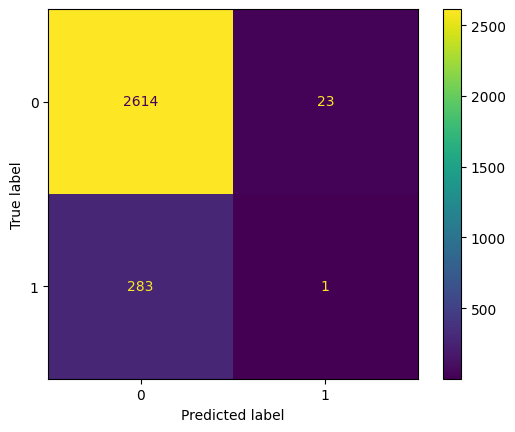

In [84]:
cm = confusion_matrix(Y_test1, predictions, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot();

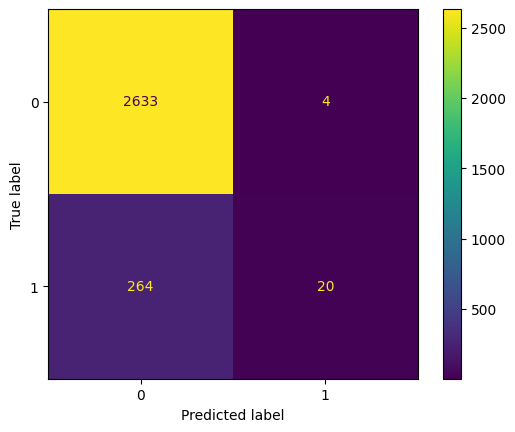

In [85]:
cm = confusion_matrix(y_val, predictions2, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot();

In [87]:
rftree1_importances = pd.DataFrame(rf2.feature_importances_, columns=['gini_importance'],index=X.columns)
rftree1_importances = rftree1_importances.sort_values(by='gini_importance', ascending=False)
main_rf1=rftree1_importances[:20]
main_rf1

gini_importance
cons_12m                                0.051092
net_margin                              0.050729
forecast_meter_rent_12m                 0.048095
forecast_cons_12m                       0.047221
margin_gross_pow_ele                    0.046492
margin_net_pow_ele                      0.045564
cons_last_month                         0.036467
pow_max                                 0.035760
months_activ                            0.031348
imp_cons                                0.030744
months_modif_prod                       0.029008
mean_year_price_off_peak                0.028014
mean_year_price_off_peak_var            0.027883
offpeak_diff_dec_january_energy         0.025720
mean_6m_price_off_peak                  0.020425
mean_6m_price_off_peak_var              0.020391
months_to_end                           0.017388
mean_9m_price_off_peak                  0.016651
months_renewal                          0.016326
forecast_price_energy_off_peak          0.016304

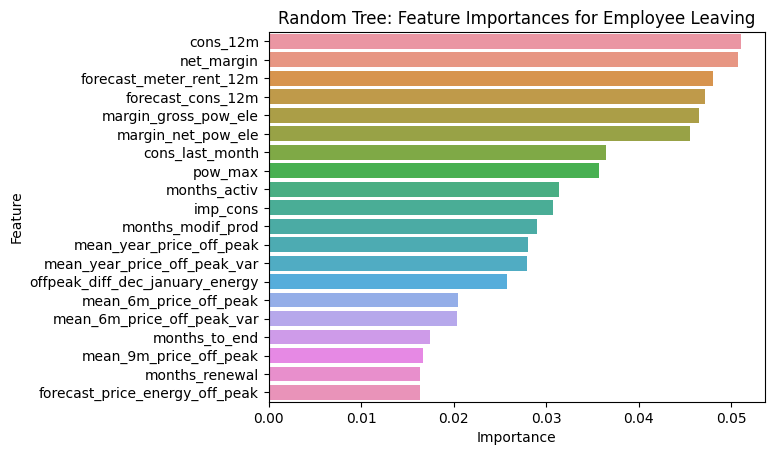

In [88]:

sns.barplot(data=main_rf1, x="gini_importance", y=main_rf1.index, orient='h')
plt.title("Random Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

We oberve the most important features here are cons_12m, net_margin, forecast_meter_rent_12m, forecast_cons_12m.

This is because they are all related to customer usage and satisfaction.

**Cons_12m:** This is the total consumption of the customer over the past 12 months. This is a good predictor of churn because customers who are consuming less are more likely to churn.

**Net_margin:** This is the profit that the company makes from the customer. Customers who are not profitable are more likely to churn.

**Forecast_meter_rent_12m:** This is the predicted meter rent for the customer over the next 12 months. Customers who are facing an increase in meter rent are more likely to churn.

**Forecast_cons_12m:** This is the predicted consumption for the customer over the next 12 months. Customers who are facing a decrease in consumption are more likely to churn.

These features are all related to customer satisfaction. Customers who are not satisfied with their consumption or their meter rent are more likely to churn. By focusing on these features, businesses can identify the customers who are at risk of churning and take steps to retain them.